In [3]:
def to_rad(deg):
    return deg * (np.pi / 180)

def to_deg(rad):
    return rad / (np.pi / 180)

import matplotlib.pyplot as plt
import numpy             as np
import csv
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()

In [35]:
def read_csv(path):
    '''
    '''

    x_list = np.array([])
    y_list = np.array([])

    with open(path, 'r') as csvfile:
        reader = csv.reader(csvfile, skipinitialspace=False, delimiter=',')
        for row in reader:
            x = row[0]
            y = row[1]
            x_list = np.append(x_list, x)
            y_list = np.append(y_list, y)           
    return x_list, y_list

normal_x_list, normal_y_list = read_csv('../../build/normal-yaw-pos.csv')
steer_x_list, steer_y_list = read_csv('../../build/steering-yaw-pos.csv')
# kafi_x_list, kafi_y_list = read_csv('../../build/kafi-yaw-pos.csv')
# test_x_list, test_y_list = read_csv('../../build/test-pos.csv')

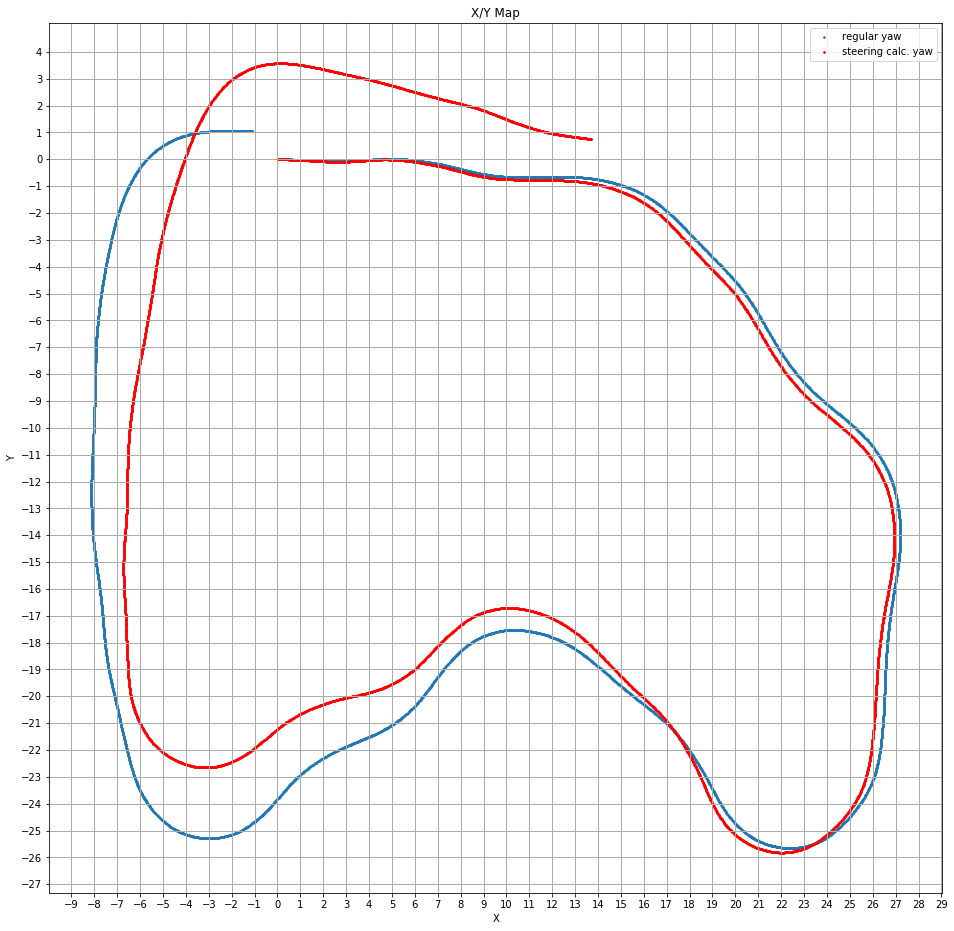

In [46]:
fig, ax = plt.subplots(figsize=(16,16))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("X/Y Map")
ax.set_yticks(np.arange(-30, 5, 1))
ax.set_xticks(np.arange(-20, 50, 1))
cut = 3900

ax.scatter(normal_x_list[:cut], normal_y_list[:cut], s = 2.5, label = 'regular yaw')
ax.scatter(steer_x_list[:cut], steer_y_list[:cut], s = 2.5, color = 'red', label = 'steering calc. yaw')
# ax.scatter(kafi_x_list[:cut], kafi_y_list[:cut], s = 2.5, color = 'green', label = 'kafi calc. yaw')

# ax.scatter(test_x_list[:cut], test_y_list[:cut], s = 2.5, label = 'regular yaw')

ax.grid(color='#ACACAC', linestyle='-', linewidth=1)
plt.legend()
plt.show()

In [ ]:
def read_csv(path):
    '''
    '''

    normal_yaw_list = np.array([])
    steer_yaw_list = np.array([])
    kafi_yaw_list = np.array([])
    
    with open(path, 'r') as csvfile:
        reader = csv.reader(csvfile, skipinitialspace=False, delimiter=',')
        for row in reader:
            normal_yaw = row[0]
            steer_yaw  = row[1]
            kafi_yaw   = row[2]
            normal_yaw_list = np.append(normal_yaw_list, normal_yaw)
            steer_yaw_list = np.append(steer_yaw_list, steer_yaw)
            kafi_yaw_list = np.append(kafi_yaw_list, kafi_yaw)
            
    return normal_yaw_list, steer_yaw_list, kafi_yaw_list3


normal_yaw_list, steer_yaw_list, kafi_yaw_list = read_csv('../../build/yaws.csv')

fig, ax = plt.subplots(figsize=(14,14))

ax.set_xlabel('Time')
ax.set_ylabel('Car Yaw in rad')
ax.set_title("Yaw comparisson")

plt.plot(normal_yaw_list, label='bosch')
# plt.plot(steer_yaw_list, label='steering calc.')
# plt.plot(kafi_yaw_list,  label='kalman')
plt.legend()
plt.grid()
plt.show()

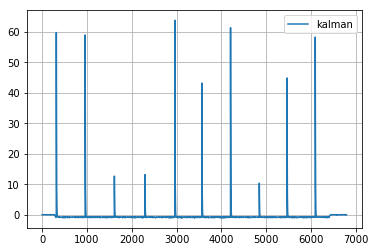

In [116]:
plt.plot(kafi_yaw_list,  label='kalman')
plt.legend()
plt.grid()
plt.show()

/home/rewrite/.anaconda3/envs/slam-examples/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


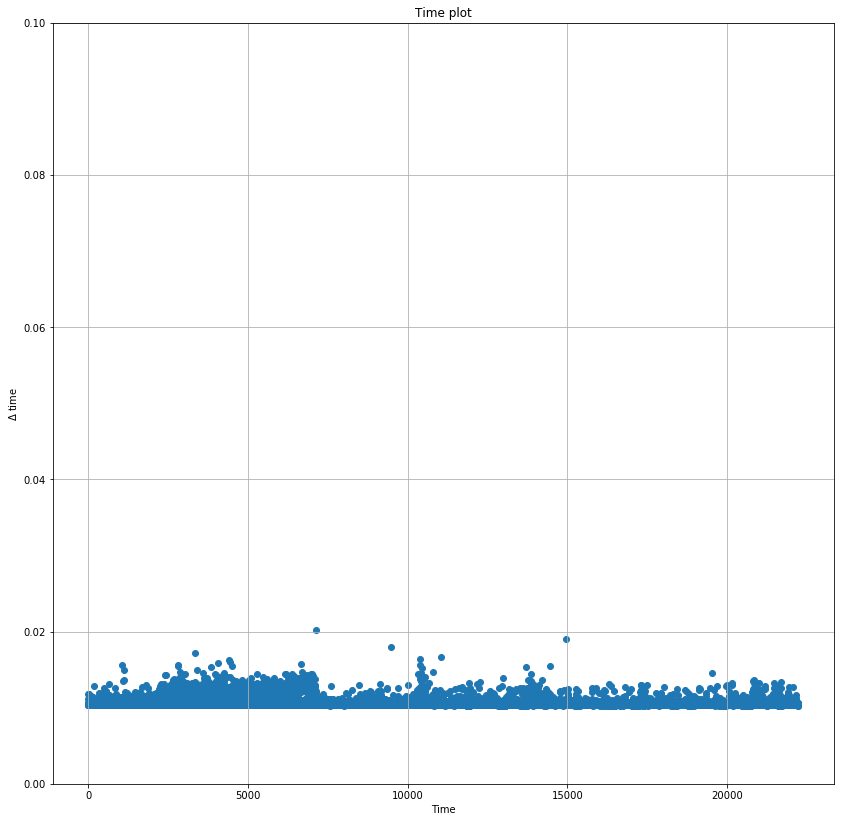

In [23]:
def read_csv(path):
    '''
    '''

    time_list = np.array([])
    
    with open(path, 'r') as csvfile:
        reader = csv.reader(csvfile, skipinitialspace=False, delimiter=',')
        for row in reader:
            time = row[0]
            time_list = np.append(time_list, float(time))            
    return time_list


time_list = read_csv('../../build/time.csv')
x = np.arange(0, len(time_list))
fit = np.polyfit(x, time_list, 1)
fit_fn = np.poly1d(fit)

fig, ax = plt.subplots(figsize=(14,14))

ax.set_xlabel('Time')
ax.set_ylabel('$\Delta$ time')
ax.set_title("Time plot")

#plt.plot(normal_yaw_list, label='bosch')

# print(len(time_list))

plt.ylim(0, 0.1)
plt.scatter(x, time_list)
# plt.plot(x, time_list, 'yo', x, fit_fn(x), '--k')
plt.legend()
plt.grid()
plt.show()

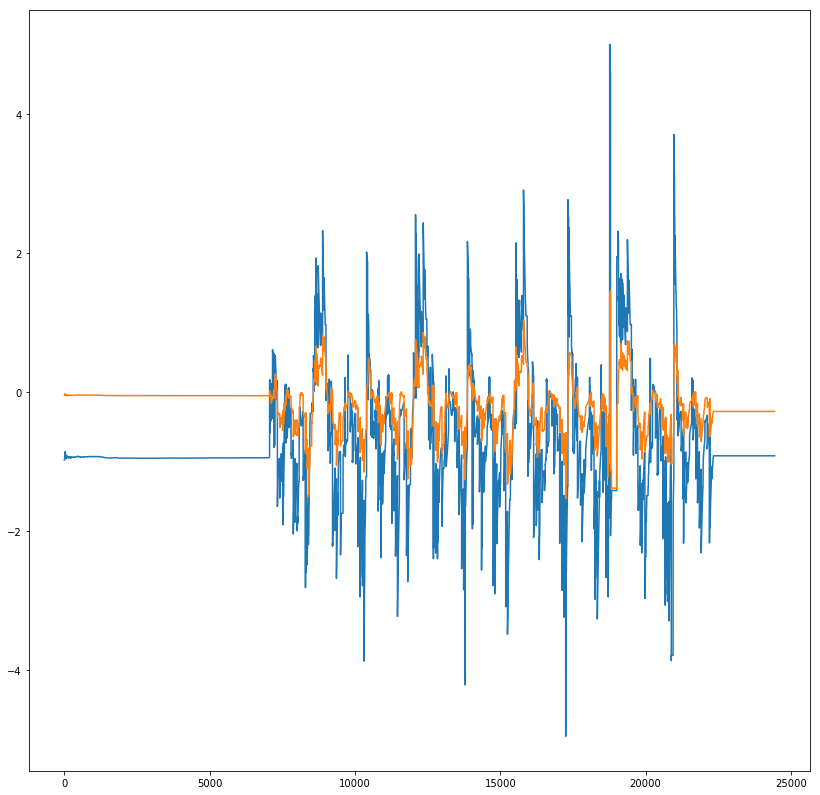

In [24]:
def read_csv(path):
    '''
    '''

    x_list = np.array([])
    y_list = np.array([])

    with open(path, 'r') as csvfile:
        reader = csv.reader(csvfile, skipinitialspace=False, delimiter=',')
        for row in reader:
            # print(row)
            x = float(row[0])
            y = float(row[1])
            if (x == 0.01): continue
            if (y == 0.01): continue
            x_list = np.append(x_list, x)
            y_list = np.append(y_list, y)           
    return x_list, y_list

distance, angle = read_csv('../example-data/wemding-2018-07-23/trackdrive-v19/t3_tp.log')


fig, ax = plt.subplots(figsize=(14,14))
x = np.arange(0, len(distance))
plt.plot(x, distance)
plt.plot(x, angle)
